In [1]:
import ultrasoundData

In [2]:
import keras
import numpy as np
forrest_ground_truth = np.array([322.6, 29.2, 5.7, 24, .12, 339, 348, 15])
big = forrest_ground_truth > 180
forrest_ground_truth[big] = 360 - forrest_ground_truth[big]

print(forrest_ground_truth)

Using TensorFlow backend.


[ 37.4   29.2    5.7   24.     0.12  21.    12.    15.  ]


In [3]:
dataprocessor = keras.models.load_model("dataProcessor")

In [4]:
timesequencemodel = keras.models.load_model("timesequencemodel")

In [1]:
scan = ultrasoundData.UltrasoundData("../../ultrasoundHacks/pose4/validation2.pickle")
scan.makeData()

import matplotlib.pyplot as plt
plt.imshow(scan.data[500, :, :, 0], cmap="gray")
plt.show()

NameError: name 'ultrasoundData' is not defined

In [ ]:
#scan2 = ultrasoundData.UltrasoundData("../../ultrasoundHacks/august10OpticalTrack3.pickle")
#scan2.makeData()

In [ ]:
from keras.models import Model


intermediate_output = dataprocessor.predict(scan.data)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(intermediate_output[:600].transpose())
plt.show()

In [ ]:
s_data, s_realangles = ultrasoundData.stagger(intermediate_output, scan.classes, 20)

In [ ]:
import scipy.signal
import numpy as np

import scipy.ndimage.filters
def analyseFile(name):
    
    #print(name)
    scan = ultrasoundData.UltrasoundData(name)
    scan.makeData()
    intermediate_output = dataprocessor.predict(scan.data)
    s_data, s_realangles = ultrasoundData.stagger(intermediate_output, scan.classes, 20)
    angle = timesequencemodel.predict(s_data[30:250]).transpose() - s_realangles[30:250, 0]
    

    
    angle *= 180 / np.pi
    """
    plt.plot(timesequencemodel.predict(s_data[:300]))
    plt.plot(s_realangles[:300, 0])
    plt.plot(s_realangles[:300, 3])
    plt.show()
    """
    angle = angle[0]
    
    angle2 = scipy.ndimage.filters.gaussian_filter1d(angle, 40)
    angle3 = scipy.signal.medfilt(angle, 61)
    #angle = scipy.signal.gaussian(angle, 61)
    #plt.scatter(s_realangles[30:250, 3], angle3, 1)
    #plt.scatter(s_realangles[30:250, 3], angle2, 1)
    plt.scatter(s_realangles[30:250, 3], angle, 1)
    #plt.plot(angle2)
    #plt.plot(angle)
    a1 = np.max(angle2) - np.min(angle2)
    a2 = np.max(angle3) - np.min(angle3)
    return a1, a2
    #plt.show()
    

In [ ]:
f = "../../ultrasoundHacks/pose{}/validation{}.pickle"
truths = []
results1 = []
results2 = []
for i in range(1, 9):
    #print("Correct Value: {}".format(forrest_ground_truth[i - 1]))
    for j in range(7):
        
        
        try:
            
            gaussian, median =analyseFile(f.format(i, j))
            truths.append([i, forrest_ground_truth[i - 1]])
            results1.append([i, gaussian])
            results2.append([i, median])
        except Exception as e:
            #print(e)
            pass

    plt.show()
results1 = np.array(results1).transpose()
results2 = np.array(results2).transpose()
truths = np.array(truths).transpose()

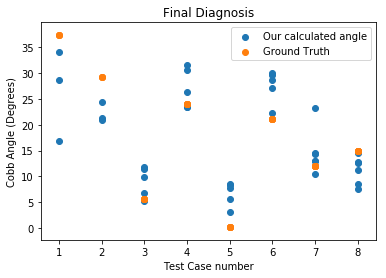

In [16]:
#gaussian = plt.scatter(results1[0], results1[1])
median = plt.scatter(results2[0], results2[1])
g_t = plt.scatter(truths[0], truths[1])

plt.legend((median, g_t), ("Our calculated angle", "Ground Truth"))
plt.title("Final Diagnosis")
plt.xlabel("Test Case number")
plt.ylabel("Cobb Angle (Degrees)")
plt.show()

In [61]:
angle

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [60]:
scipy.signal.medfilt(np.linspace(0, 20), 21)

array([  0.        ,   0.40816327,   0.81632653,   1.2244898 ,
         1.63265306,   2.04081633,   2.44897959,   2.85714286,
         3.26530612,   3.67346939,   4.08163265,   4.48979592,
         4.89795918,   5.30612245,   5.71428571,   6.12244898,
         6.53061224,   6.93877551,   7.34693878,   7.75510204,
         8.16326531,   8.57142857,   8.97959184,   9.3877551 ,
         9.79591837,  10.20408163,  10.6122449 ,  11.02040816,
        11.42857143,  11.83673469,  12.24489796,  12.65306122,
        13.06122449,  13.46938776,  13.87755102,  14.28571429,
        14.69387755,  15.10204082,  15.51020408,  15.91836735,
        15.91836735,  15.91836735,  15.91836735,  15.91836735,
        15.91836735,  15.91836735,  15.91836735,  15.91836735,
        15.91836735,  15.91836735])

In [80]:
scipy.signal.sm

In [16]:
for layer in timesequencemodel.layers:
    print(str(layer))
    try:
        print(layer.filters)
    except Exception:
        pass
    try:
        print(layer.output_shape)
    except Exception:
        pass

(None, 1024)
(None, 1024)
(None, 1)


In [14]:
x = dataprocessor.layers[-1]

In [15]:
x.rate

0.5

In [31]:
test = scan.data[:,:,:,0]

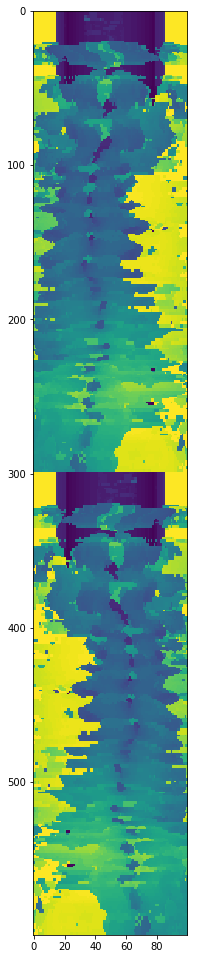

In [36]:
plt.imshow(np.argmax(test, 1))
plt.show()

In [14]:
import matplotlib

In [19]:
matplotlib.rcParams["figure.figsize"] = (17, 17)